In [2]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Avoid printing set copy warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
buildings_df = gpd.read_file('../processed_data/relevant_buildings.shp')


In [4]:
print(buildings_df.crs)

epsg:4326


In [5]:
# Splitting up grocery stores data to add buffers
grocery_stores = buildings_df[buildings_df['class_reco'].str.contains('Grocery')]
grocery_stores['geometry'] = grocery_stores['geometry'].to_crs(epsg=3857) # converting to this CRS changes the units to meters
grocery_stores['geometry'] = grocery_stores['geometry'].buffer(1609.34) # 1609 meters = 1 mile - buffering adds a buffer around the point with this radius

res_buildings = buildings_df[buildings_df['class_reco'].str.contains('Residential')]
res_buildings['geometry'] = res_buildings['geometry'].to_crs(epsg=3857)

<AxesSubplot:>

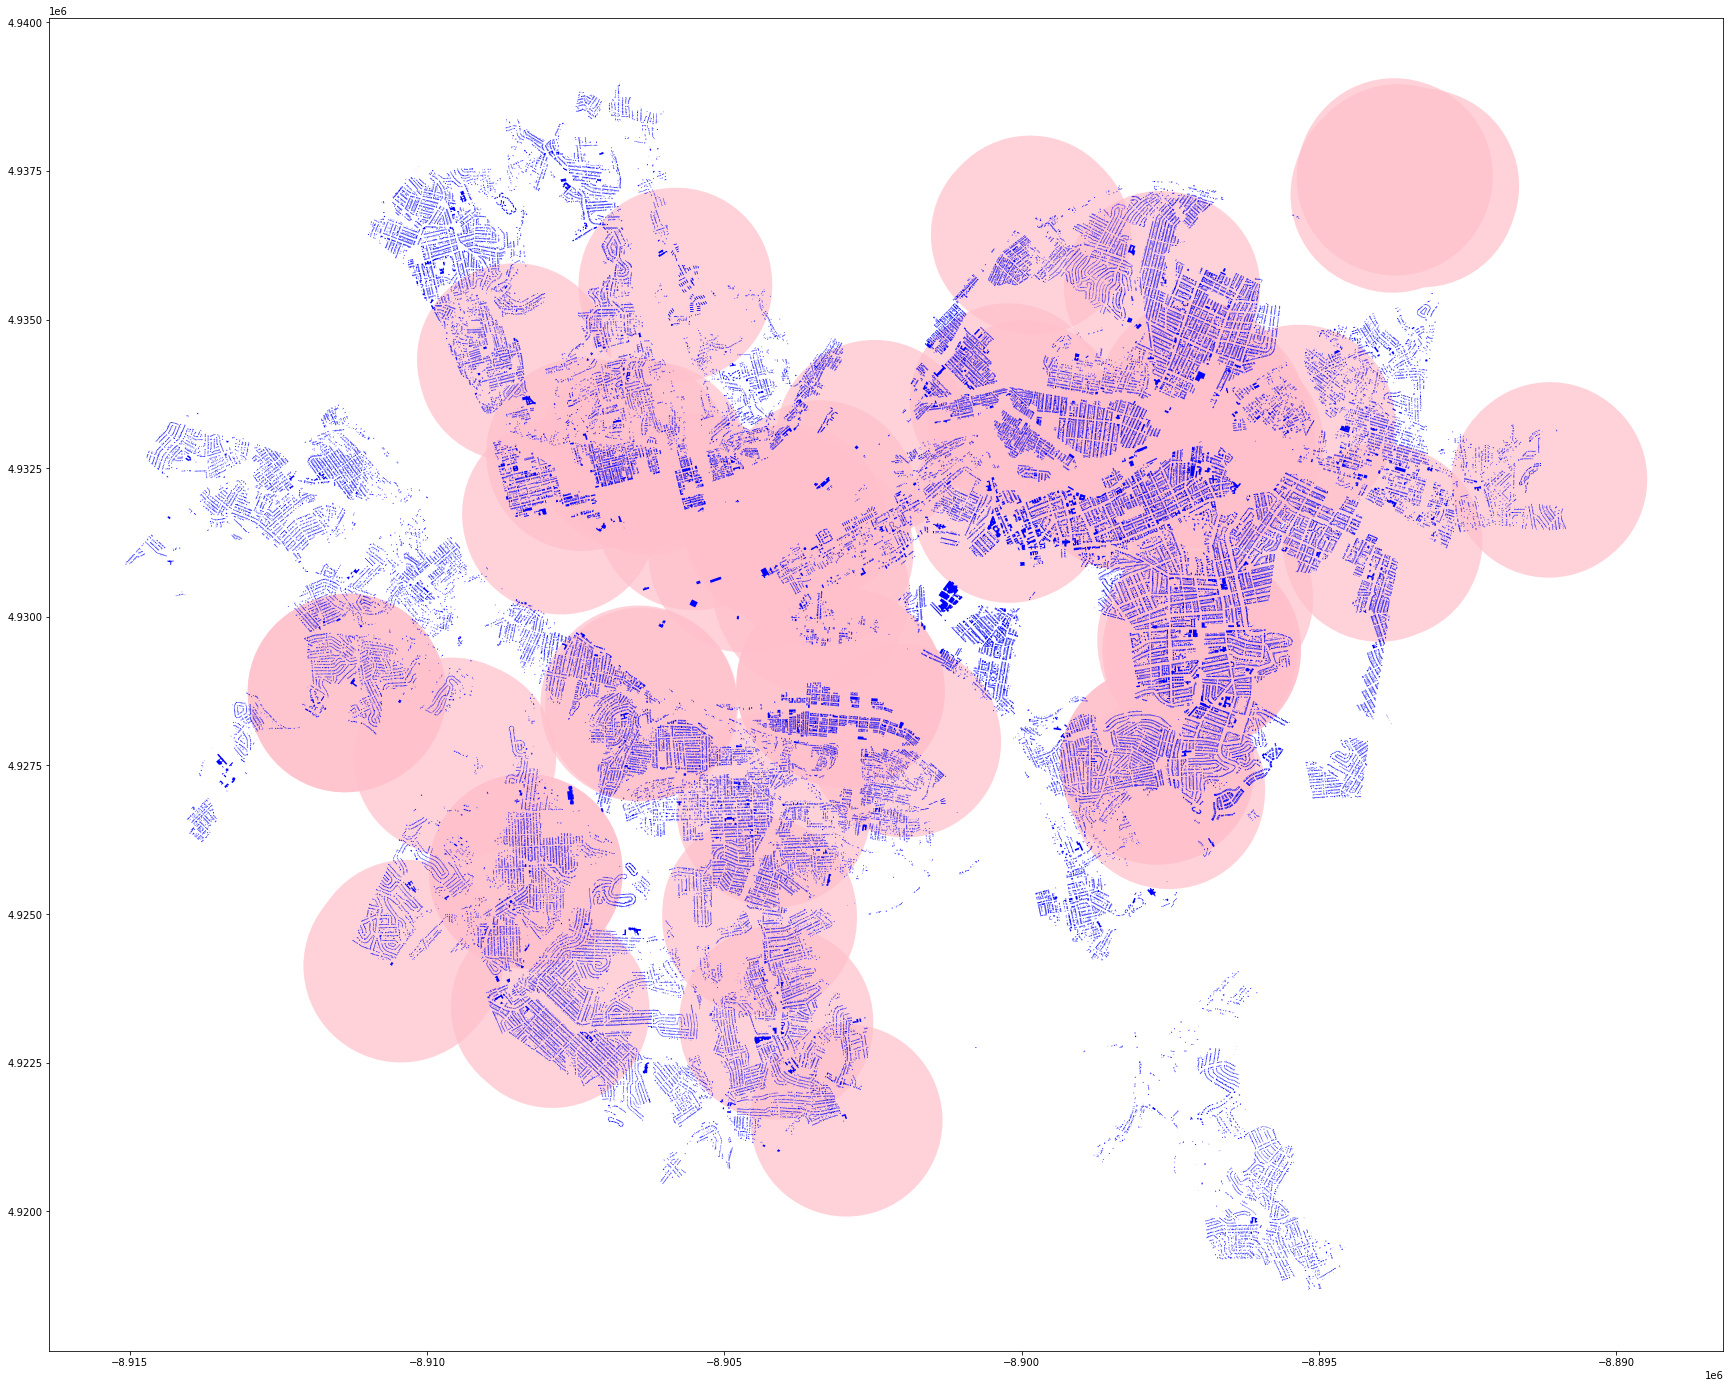

In [11]:
# plotting
f, ax = plt.subplots(figsize=(30,30))
grocery_stores.plot(ax=ax, alpha=0.7, color='pink', label='Grocery stores + 1 mile buffer')
res_buildings.plot(ax=ax, color='blue', label='Residential buildings')
